In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [40]:
data = pd.read_csv('C:/Users/ABA/Desktop/nikamooz/mainCourseSTuuf/dataset/student/student-mat.csv',delimiter=';')

data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [3]:
data.loc[data.G3 >= 12, 'Ghabool'] = 1
data.loc[data.G3 < 12, 'Ghabool'] = 0

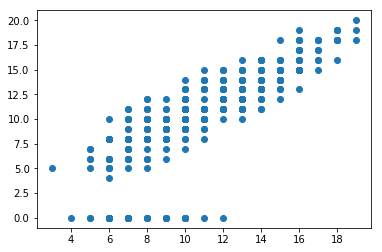

In [4]:
plt.scatter(data['G1'], data['G3'])
plt.show()

In [5]:
linear_model = LinearRegression()
linear_model.fit(data[["G2"]], data["Ghabool"])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:

logistic_model = LogisticRegression()
logistic_model.fit(data[["G2"]], data["Ghabool"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
probabilities = logistic_model.predict_proba(data[["G2"]])

In [8]:
# احتمالات مربوط به لیبل 0 یا همان مردودی
probabilities[:,0]
# احتمالات مربوط به 1 یا قبولی
probabilities[:,1]

array([9.79323747e-06, 1.26211714e-06, 5.89298293e-04, 9.92289804e-01,
       3.42847454e-02, 9.98999627e-01, 6.81278082e-01, 1.26211714e-06,
       9.99997857e-01, 9.98999627e-01, 5.89298293e-04, 6.81278082e-01,
       9.92289804e-01, 3.42847454e-02, 9.99870964e-01, 9.92289804e-01,
       9.92289804e-01, 3.42847454e-02, 1.26211714e-06, 3.42847454e-02,
       9.92289804e-01, 9.98999627e-01, 9.98999627e-01, 9.43136728e-01,
       4.55448219e-03, 4.55448219e-03, 6.81278082e-01, 9.99870964e-01,
       2.15978349e-01, 6.81278082e-01, 2.15978349e-01, 9.99870964e-01,
       9.99870964e-01, 3.42847454e-02, 9.92289804e-01, 7.59849990e-05,
       9.99870964e-01, 9.99870964e-01, 6.81278082e-01, 9.43136728e-01,
       3.42847454e-02, 6.81278082e-01, 9.99997857e-01, 5.89298293e-04,
       3.42847454e-02, 5.89298293e-04, 6.81278082e-01, 9.99999724e-01,
       9.98999627e-01, 7.59849990e-05, 9.43136728e-01, 9.43136728e-01,
       2.15978349e-01, 3.42847454e-02, 9.43136728e-01, 4.55448219e-03,
      

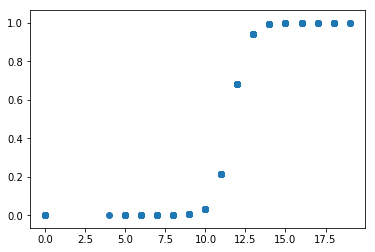

In [9]:
plt.scatter(data["G2"], probabilities[:,1])

In [10]:
logistic_model.fit(data[["studytime"]], data["Ghabool"])
probabilities = logistic_model.predict_proba(data[["studytime"]])

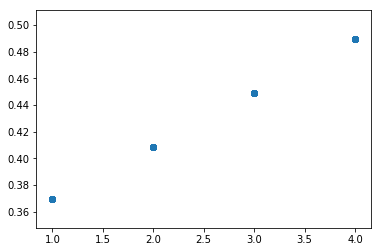

In [11]:
plt.scatter(data["studytime"], probabilities[:,1])

## Prediction

In [21]:
logistic_model.fit(data[["G2"]], data["Ghabool"])
fitted_labels = logistic_model.predict(data[["G2"]])

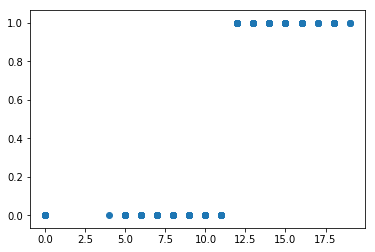

In [13]:
plt.scatter(data["G2"], fitted_labels)

In [14]:
logistic_model.score(data[["G2"]], fitted_labels)

1.0

## Regularization & Multiple Feature

In [23]:
newdf = pd.read_csv('C:/Users/ABA/Desktop/nikamooz/mainCourseSTuuf/dataset/wdbc.csv')
traindf = newdf[1:250]
testdf = newdf[251:500]

### پارامتر C


In [36]:
logistic_model = LogisticRegression(C=100)
logistic_model.fit(traindf[["V8"]], traindf["Class"])
fitted_labels = logistic_model.predict(testdf[["V8"]])
logistic_model.score(testdf[["Class"]], fitted_labels)

0.3092369477911647